In [21]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

#Fitting the part. Th

In [22]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

17
found *.csv file: 
['/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/

In [23]:
file_num=12
marker=['>','o','o','o','o','s','s','s','s','s','s','^']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])


1983 CESAR
df:(1,4)
F ratio: 0.00919967370577
ftest:0.928201343545
sinking   :5.527309e+02,error:4.518969e+02

1987 ARKIV/3 Stn1
df:(1,6)
F ratio: 0.574588506849
ftest:0.477148064908
sinking   :5.608831e+02,error:1.002860e+02

1987 ARKIV/3 Stn2
df:(1,5)
F ratio: 6.39961578561
ftest:0.0525462278523
sinking   :8.210983e+02,error:1.091786e+02

1987 ARKIV/3 Stn3
df:(1,5)
F ratio: 0.151940415074
ftest:0.71273866018
sinking   :2.198856e+02,error:2.674898e+01

1987 ARKIV/3 Stn4
df:(1,4)
F ratio: 0.585343448233
ftest:0.486871655692
sinking   :5.574027e+02,error:5.167190e+02

1991 ARCTIC EXPEDITION Stn1
df:(1,3)
F ratio: 14.7274729984
ftest:0.0311991210768
sinking   :1.212005e+03,error:2.492106e+02

1991 ARCTIC EXPEDITION Stn2
df:(1,2)
F ratio: 170.114499074
ftest:0.00582706309122
sinking   :8.720009e+02,error:1.642536e+01

1991 ARCTIC EXPEDITION Stn3
df:(1,4)
F ratio: 10.6590777757
ftest:0.0309397094034
sinking   :4.899110e+02,error:5.091561e+01

1991 ARCTIC EXPEDITION Stn4
df:(1,4)
F ratio: 

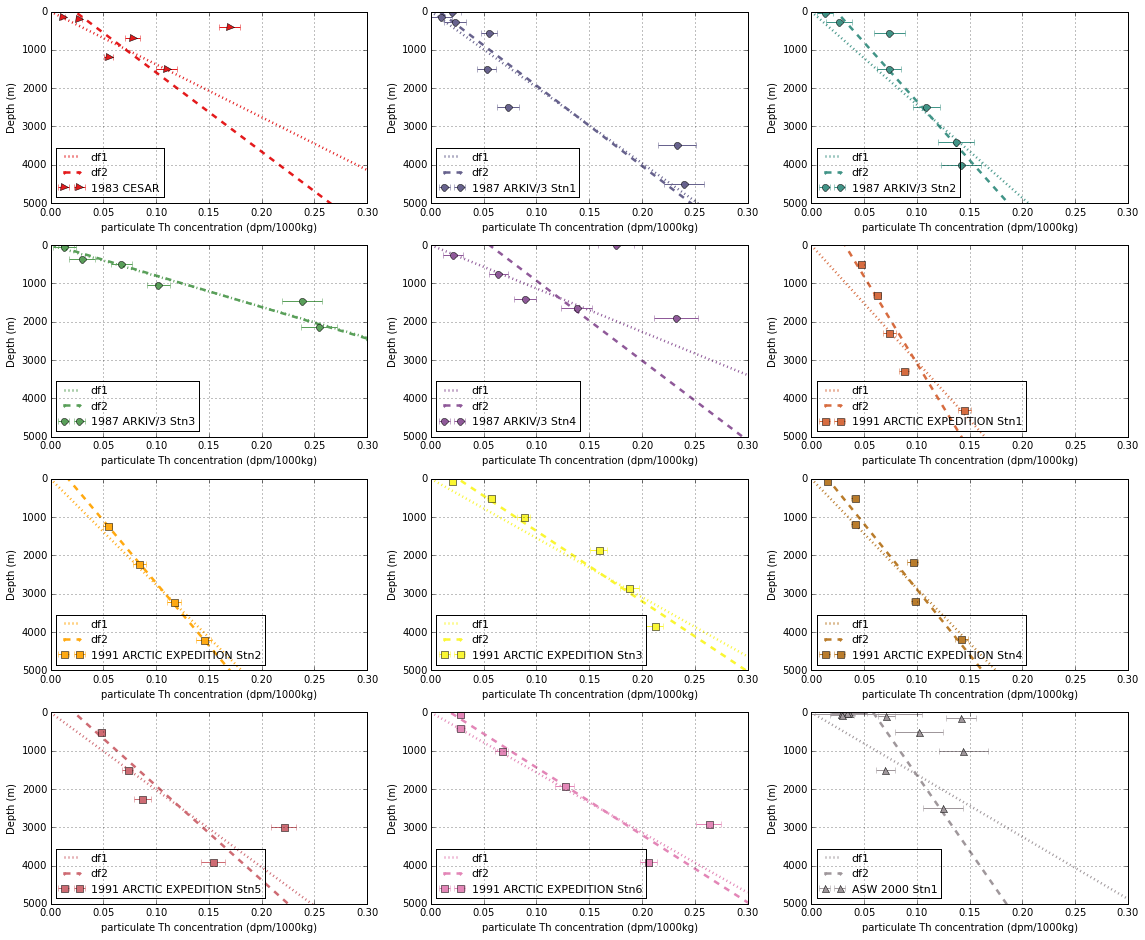

In [24]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(file_num):

    data=pd.read_csv(nc_filename[j])

    y= data['depth'];
    name= data['name'][0];
    x=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_part_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    
    y2 = sm.add_constant(y,prepend=False)
    #y2=y
    res_wls = sm.WLS(x, y2, weights=1./err).fit()
    
    ftest=sm.WLS(x, y, weights=1./err).fit()


    model1=np.sum(ftest.resid**2/err**2)
    model2=np.sum(res_wls.resid**2/err**2)
    rss1[j]=model1
    rss2[j]=model2
    
    p1 = 1
    p2 = 2
    n = len(x)
    #F = (ftest.mse_resid - res_wls.mse_resid)/(res_wls.mse_resid) *(n-p2)/(p2-p1)
    F = ( model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    sinking_rate[j,:]=0.0267/res_wls.params[0]
    err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
  
    
    
    print ('')
    print (name)
    #print ('rss(model constant):%s'%ftest.mse_resid)
    #print ('rss(model 2df):%s'%res_wls.mse_resid)
    #print ('rss(model 1df):%s'%model1)
    #print ('rss(model 2df):%s'%model2)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('F ratio: %s'%F)
    print ('ftest:%s'%p)
    #print ('slope:%e,error:%e'%(res_wls.params[0],res_wls.bse[0]))
    #print ('C1   :%e,error:%e'%(res_wls.params[1],res_wls.bse[1]))
    print ('sinking   :%e,error:%e'%(sinking_rate[j,:],err1[j,:]))

    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)#Spectral(j*23)
    ax.plot([0, 0.3],[0, 0.3]/ftest.params[0], ':',c=cc,linewidth=2.5,label='df1')
    ax.plot([0, 0.3],[0, 0.3]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
#    if j+1==1 or j+1==5 or j+1==9:
    plt.ylabel('Depth (m)')
#    if j+1==10 or j+1==11: #or j+1==9:
#        plt.xlabel('Particulate Th concentration (dpm/1000kg)')
    plt.xlabel('particulate Th concentration (dpm/1000kg)')
#    plt.ylabel('Depth (m)')
#    if not(j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    plt.tight_layout()
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
plt.show()

In [25]:
#f_test
p1 = 1
p2 = 2
n = 77
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,53)
F ratio: 5.93234642469
ftest:0.0172405820137


#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [26]:
WLS_err2=np.empty([file_num,1])
Kvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])


1983 CESAR
F ratio: 0.0107816828722
df:(1,5)
ftest:0.921336719134

1987 ARKIV/3 Stn1
F ratio: 4.26342166037
df:(1,6)
ftest:0.0844926315262

1987 ARKIV/3 Stn2
F ratio: -0.314924781494
df:(1,5)
ftest:1.0
df1 weighted resid. sum:62.9524057115
df2 weighted resid. sum:67.1839861427
df1:[  4.38372109   1.1713689    2.20037823  40.86398562   1.4639106
   0.19261979  12.67642147]
df2:[  2.07319721e+01   2.41284922e-01   8.48542058e-01   3.45649168e+01
   1.83274708e+00   1.39108595e-02   8.95061240e+00]

1987 ARKIV/3 Stn3
F ratio: 14.2466032515
df:(1,5)
ftest:0.0129633002279

1987 ARKIV/3 Stn4
F ratio: 1.95336358291
df:(1,4)
ftest:0.234758049487

1991 ARCTIC EXPEDITION Stn1
F ratio: 2.96040090349
df:(1,3)
ftest:0.183811908722

1991 ARCTIC EXPEDITION Stn2
F ratio: 1.82725568181
df:(1,2)
ftest:0.309035202066

1991 ARCTIC EXPEDITION Stn3
F ratio: 17.3531282962
df:(1,4)
ftest:0.014079969905

1991 ARCTIC EXPEDITION Stn4
F ratio: 6.88310092092
df:(1,4)
ftest:0.0585798431201

1991 ARCTIC EXPEDITION 

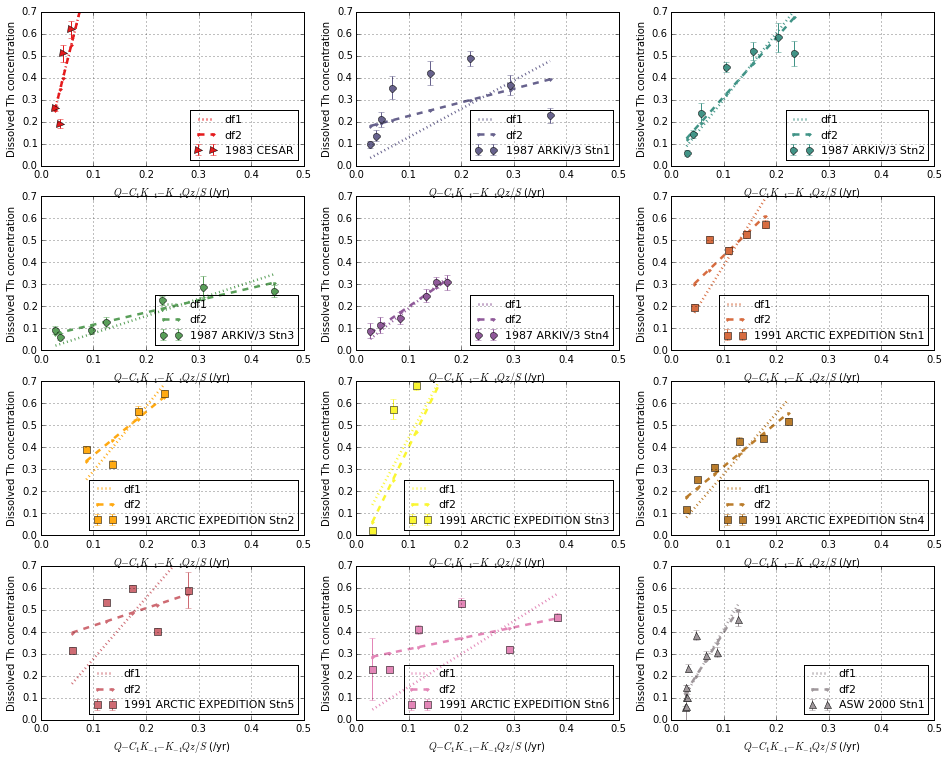

In [58]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_diss_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    y2=np.empty(len(x))
    for k in range (len(x)):
        y2[k]=(0.0267-WLS_coef1[j,:]*1.6)+(0.0267*1.6/sinking_rate[j])*y[k]
    
    #fit: model2
    y3 = sm.add_constant(y2,prepend=False)  
    res_wls2 = sm.WLS(x,y3, weights=1./err).fit() 
    
    Kvalue[j]=1/res_wls2.params[0]
    WLS_coef2[j]=res_wls2.params[0]
    WLS_err2[j]=res_wls2.bse[0]
    err2=res_wls2.bse[0]/res_wls2.params[0]*Kvalue
    
    #fit: model1
    ftest=sm.WLS(x, y2, weights=1./err).fit()     
    
    #calculate weighted resid. sum
    resid1=ftest.resid**2/err**2                
    model1=np.sum(resid1)

    resid2=res_wls2.resid**2/err**2
    model2=np.sum(resid2)
    
    #prepare data to recalculate the whole profile later
    rss1[j]=model1                
    rss2[j]=model2

    #f_test
    p1 = 1
    p2 = 2
    n = len(x)
    F = (model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    #print related data
    print ('')
    print (name)
    print ('F ratio: %s'%F)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('ftest:%s'%p)
    if j==2 or j==11:
        print ('df1 weighted resid. sum:%s'%model1)
        print ('df2 weighted resid. sum:%s'%model2)
        print ('df1:%s'%resid1)
        print ('df2:%s'%resid2)
    #print ('K   :%e,error:%e'%(Kvalue[j,:],err2[j,:]))
    
    #plot
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)
    ax.plot(y2, ftest.fittedvalues, ':',c=cc,linewidth=2.5,label='df1')
    ax.plot(y2, res_wls2.fittedvalues, '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(y2,x,yerr=err, fmt=marker[j],markersize=7,c=cc,label=name)    
    ax.legend(loc=4,fontsize=11)

    ax.set_ylim([0, 0.7])
    ax.set_xlim([0, 0.5])
#    if j+1==5: #or j+1==5 or j+1==9:
    plt.ylabel('Dissolved Th concentration')# (dpm/1000kg)')
#    if j+1==10 or j+1==11: #or j+1==9:
    plt.xlabel('$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
#    if not(j+1==8 or j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.grid()

#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

In [28]:
p1 = 1
p2 = 2
n = 77
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,53)
F ratio: 15.1394082856
ftest:0.000214456518224


# WLS: sinking rate and the ice concentration

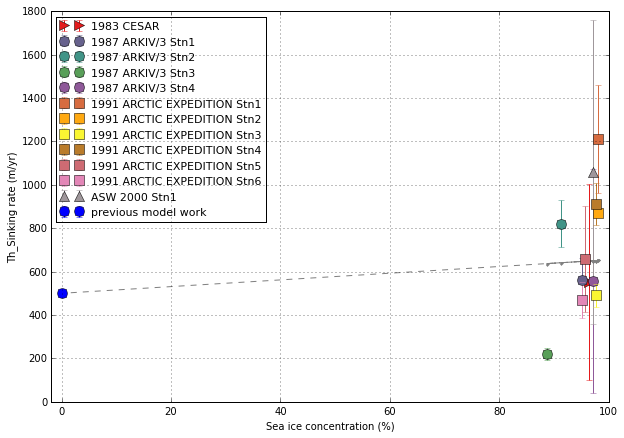

In [29]:
i=np.empty([file_num,1])
#for j in range(11):
#    data=pd.read_csv(nc_filename[j])
#    i[j,:]= data['ice'][0];
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2]) #'remember to add i'
#marker=      ['o','o','o','o',   '^','s','s','s','s','s', 's','D','D','>']
    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.0001)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [30]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            WLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.170
Date:                Fri, 10 Jul 2015   Prob (F-statistic):              0.103
Time:                        10:09:02   Log-Likelihood:                -63.334
No. Observations:                  13   AIC:                             130.7
Df Residuals:                      11   BIC:                             131.8
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5441      0.867      1.781      0.103        -0.365     3.453
const        499.9999      0.343   1455.856      0.0

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1205: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


In [31]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'sinking_rate':sinking_rate, 'i3': i})
mod_wls5 = wls('sinking_rate~i3', data,weights=1./(err1))
res_wls5 = mod_wls5.fit()
#print res_wls5.summary()

In [32]:
a=average(sinking_rate)
#print a
#print sinking_rate

In [33]:
rss=(sinking_rate-a)**2
rss_sum=sum(rss)
p1 = 1
p2 = 2
n = file_num
F = (rss_sum - res_wls5.mse_resid)/(res_wls5.mse_resid) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('ftest:%s'%p)

F ratio: 7671.30265374
df:(1,10)
ftest:8.881784197e-16


# WLS: K value and the ice concentration

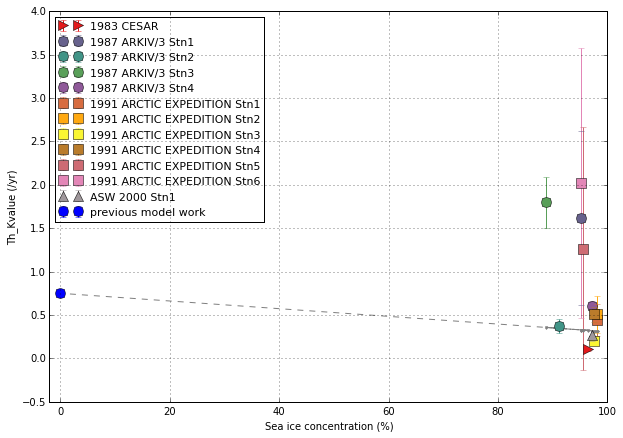

In [34]:
err2=WLS_err2/WLS_coef2*Kvalue
#err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2*1.6# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.75)
err2=numpy.append(err2,0.0001)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./err2)
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [35]:
print res_wls4.summary() 

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            WLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     19.72
Date:                Fri, 10 Jul 2015   Prob (F-statistic):           0.000995
Time:                        10:09:03   Log-Likelihood:                -19.924
No. Observations:                  13   AIC:                             43.85
Df Residuals:                      11   BIC:                             44.98
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0044      0.001     -4.440      0.001        -0.007    -0.002
const          0.7500      0.012     61.580      0.0

In [36]:
#f-test k value

In [37]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'Kvalue':Kvalue, 'i3': i})
mod_wls6 = wls('Kvalue~i3', data,weights=1./(err2))
res_wls6 = mod_wls6.fit()
print res_wls6.summary()

                            WLS Regression Results                            
Dep. Variable:                 Kvalue   R-squared:                       0.642
Model:                            WLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     19.72
Date:                Fri, 10 Jul 2015   Prob (F-statistic):           0.000995
Time:                        10:09:03   Log-Likelihood:                -19.924
No. Observations:                  13   AIC:                             43.85
Df Residuals:                      11   BIC:                             44.98
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7500      0.012     61.580      0.000         0.723     0.777
i3            -0.0044      0.001     -4.440      0.0

In [38]:
b=average(Kvalue)

In [39]:
#rss2=(Kvalue-b)**2*(1./(err2**2))
rss2=(Kvalue-b)**2
rss2_sum=sum(rss2)
p1 = 1
p2 = 2
n = file_num
F = (rss2_sum - res_wls6.mse_resid)/(res_wls6.mse_resid) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('rss(model constant):%s'%rss2_sum)
print ('rss(model 2df):%s'%res_wls6.mse_resid)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('F ratio: %s'%F)
print ('pvalue:%s'%p)

rss(model constant):5.01174514457
rss(model 2df):1.48349786063
df:(1,10)
F ratio: 23.7832987669
pvalue:0.000645020174085


# map

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


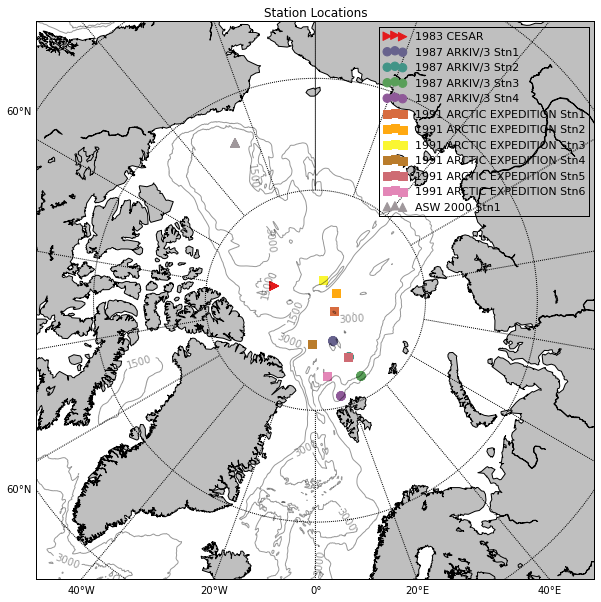

In [40]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Set1(j*23),marker=marker[j],s=70,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()